## **자기조직화맵(Self-Organizing Map, SOM)**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (15, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<img src="https://blog.kakaocdn.net/dn/S2hMq/btrokqPL3FK/DfZFWZCK3TCUichk56jBTk/img.gif">

In [3]:
path = '/content/drive/MyDrive/이대과제/excel/학원교습소정보_강남구_양천구_위경도.xlsx'
df = pd.read_excel(path)
df

,학원교습소구분명,시설도로명주소,경도,위도
0,교습소,서울특별시 강남구 도곡로 405,127.054668,37.497369
1,교습소,서울특별시 강남구 삼성로61길 41,127.057139,37.498445
2,교습소,서울특별시 강남구 삼성로63길 19,127.058593,37.499494
3,교습소,서울특별시 강남구 개포로82길 7,127.067333,37.488755
4,교습소,서울특별시 서초구 바우뫼로20길 25,127.034088,37.474107
...,...,...,...,...
10817,학원,서울특별시 양천구 목동서로 100,126.874169,37.534224
10818,학원,서울특별시 양천구 국회대로 92,126.845261,37.526895
10819,학원,서울특별시 양천구 목동서로 77,126.877988,37.535963
10820,학원,서울특별시 양천구 목동서로 285,126.869140,37.521857


In [4]:
X = df[['경도', '위도']].values

## Explanation of Parameters:
- **x=3, y=3: SOM 그리드의 크기를 정의합니다.**
    - x는 그리드의 가로 방향 크기입니다. 여기서는 3로 설정되어 있어 가로로 3개의 노드를 갖습니다.
    - y는 그리드의 세로 방향 크기입니다. 여기서는 3으로 설정되어 있어 세로로 3개의 노드를 갖습니다.
    - 따라서 SOM 그리드는 총 1x3의 배열로 구성됩니다. 즉, 3행 3열로 구성된 9개의 노드가 있는 그리드입니다.
- **input_len=2: 입력 데이터의 특징 개수를 정의합니다**.
    - SOM에 입력되는 벡터의 길이를 지정합니다. 여기서는 2(위도와 경도)로 설정되어 있어 각 입력 벡터는 2개의 특징을 가지고 있습니다.
- **sigma=1.0: 이웃 함수의 확산 정도를 설정합니다.**
    -이 값은 SOM이 학습할 때 각 노드가 이웃 노드에 미치는 영향을 결정합니다.
값이 클수록 더 많은 이웃 노드가 영향을 받게 되며, 값이 작을수록 영향 범위가 좁아집니다.
    - 여기서는 1.0으로 설정되어 있어 중간 정도의 확산을 의미합니다.
- **learning_rate=0.5: 학습률을 정의합니다.**
    - 학습률은 SOM이 입력 데이터를 학습하는 속도를 결정합니다.
    - 값이 클수록 노드의 가중치가 더 빠르게 업데이트되지만, 너무 크면 학습이 불안정해질 수 있습니다.
    - 여기서는 0.5로 설정되어 있어 적당한 속도로 학습이 진행됩니다.

In [6]:
! pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=486ea5b3592d1593591c89c9eb9cd4f4c744d5e3cb811ebd61233f0f72722f67
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [7]:
from minisom import MiniSom

# SOM 초기화
som = MiniSom(x=3, y=3, input_len=2, sigma=1.0, learning_rate=0.5)

# SOM 훈련
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# 결과를 저장할 리스트 초기화
clusters = []

# 각 데이터 포인트에 대해 승자 뉴런을 찾고 클러스터 할당
for i in range(len(X)):
    winner = som.winner(X[i])
    clusters.append(winner)

# 클러스터 결과를 데이터프레임에 추가
df['Cluster'] = [str(cluster) for cluster in clusters]
df

,학원교습소구분명,시설도로명주소,경도,위도,Cluster
0,교습소,서울특별시 강남구 도곡로 405,127.054668,37.497369,"(2, 0)"
1,교습소,서울특별시 강남구 삼성로61길 41,127.057139,37.498445,"(1, 1)"
2,교습소,서울특별시 강남구 삼성로63길 19,127.058593,37.499494,"(1, 1)"
3,교습소,서울특별시 강남구 개포로82길 7,127.067333,37.488755,"(1, 2)"
4,교습소,서울특별시 서초구 바우뫼로20길 25,127.034088,37.474107,"(0, 2)"
...,...,...,...,...,...
10817,학원,서울특별시 양천구 목동서로 100,126.874169,37.534224,"(0, 0)"
10818,학원,서울특별시 양천구 국회대로 92,126.845261,37.526895,"(0, 2)"
10819,학원,서울특별시 양천구 목동서로 77,126.877988,37.535963,"(0, 0)"
10820,학원,서울특별시 양천구 목동서로 285,126.869140,37.521857,"(0, 2)"


In [13]:
data= df[['경도', '위도']].values
print(data.shape)

(10822, 2)


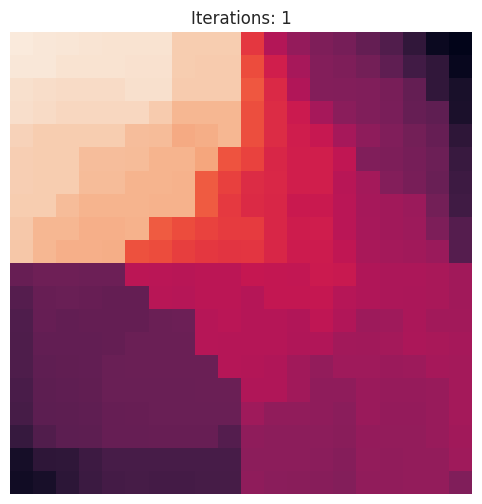

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML

# SOM 클래스 정의
class SOM:
    def __init__(self, width, height, input_dim):
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.weights = np.random.rand(height, width, input_dim)
        self.radius = max(width, height) / 2
        self.learning_rate = 0.1

    def find_bmu(self, input_vec):
        distance = np.sum((self.weights - input_vec)**2, axis=2)
        return np.unravel_index(distance.argmin(), distance.shape)

    def _update_weights(self, input_vec, bmu, iteration, total_iterations):
        learning_rate = self.learning_rate * np.exp(-iteration / total_iterations)
        radius_decay = self.radius * np.exp(-iteration / total_iterations)
        for x in range(self.width):
            for y in range(self.height):
                dist_to_bmu = np.sqrt((x - bmu[0])**2 + (y - bmu[1])**2)
                if dist_to_bmu < radius_decay:
                    influence = np.exp(-dist_to_bmu / (2 * (radius_decay**2)))
                    self.weights[y, x, :] += learning_rate * influence * (input_vec - self.weights[y, x, :])

    def train(self, data, num_iterations):
        weight_maps = []
        for i in range(num_iterations):
            for input_vec in data:
                bmu = self.find_bmu(input_vec)
                self._update_weights(input_vec, bmu, i, num_iterations)
            weight_maps.append(np.copy(self.weights))
        return weight_maps

# SOM 격자 생성 및 학습 데이터 준비
som = SOM(20, 20, 2) # 입층 2차원 2개
num_iterations = 20

# 학습 설정 및 가중치 기록
weight_maps = som.train(data, num_iterations)

# 애니메이션 함수 정의
def animate(i):
    plt.clf()
    average_weights = np.mean(weight_maps[i], axis=2)
    plt.imshow(average_weights, interpolation='nearest')
    plt.title(f'Iterations: {i+1}')
    plt.axis('off')

# 애니메이션 생성 및 표시
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=500, repeat=False)

# 애니메이션을 HTML로 표시
HTML(ani.to_jshtml())